In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [2]:
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/disease-symptom-description-dataset/dataset.csv')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
symp_cols = df[df.columns[1:]].columns

In [6]:
%%time
values = []
for col in symp_cols :
    values = values + list(df[symp_cols[0]].values)
    

CPU times: user 8 ms, sys: 819 µs, total: 8.81 ms
Wall time: 10.2 ms


In [7]:
counter = Counter(values)

In [8]:
results = pd.Series(dict(counter))

<AxesSubplot:>

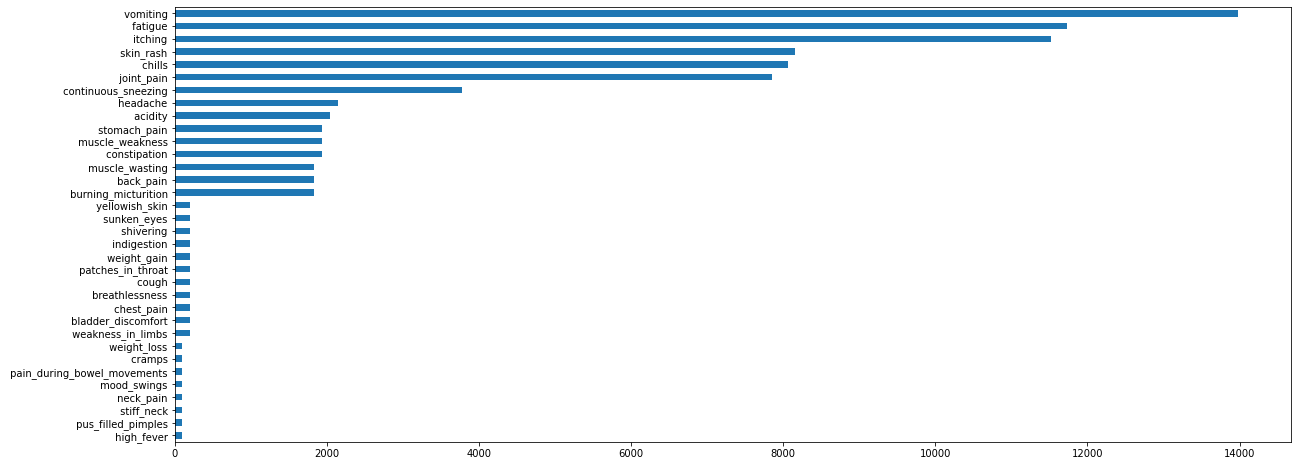

In [9]:
results.sort_values(ascending=True).plot(kind='barh',figsize=(20,8))

In [10]:
df.fillna(" notprovided ",inplace=True)

In [11]:
symp_cols = df[df.columns[1:]].columns

#df[f"{symptom}"] = df[col].apply(lambda x : 1 if str(symptom) in x else x)

In [12]:
df.dropna(axis=1,inplace=True,how='all')

In [13]:
symp_cols

Index(['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'symptom_6', 'symptom_7', 'symptom_8', 'symptom_9', 'symptom_10',
       'symptom_11', 'symptom_12', 'symptom_13', 'symptom_14', 'symptom_15',
       'symptom_16', 'symptom_17'],
      dtype='object')

In [14]:
df["symptoms"] = df['symptom_1'] + "--" + df['symptom_2'] + "--" + df['symptom_3'] + "--" + df['symptom_4'] + "--" + df['symptom_5'] + "--" + \
        df['symptom_6'] + "--" + df['symptom_7'] + "--" + df['symptom_8'] + "--" + df['symptom_9'] + "--" + df['symptom_10'] + "--" + \
        df['symptom_11'] + "--" + df['symptom_12'] + "--" + df['symptom_13'] + "--" + df['symptom_14'] + "--" + df['symptom_15'] + "--" + \
        df['symptom_16'] + "--" + df['symptom_17']

In [15]:
df = df[["disease","symptoms"]]

In [16]:
df["symptoms"].apply(lambda x: 1 if "itching" in x else 0)

0       1
1       0
2       1
3       1
4       1
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: symptoms, Length: 4920, dtype: int64

In [17]:
results.index

Index(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue', ' weight_loss',
       ' sunken_eyes', ' cough', ' headache', ' chest_pain', ' back_pain',
       ' weakness_in_limbs', ' chills', ' joint_pain', ' yellowish_skin',
       ' constipation', ' pain_during_bowel_movements', ' breathlessness',
       ' cramps', ' weight_gain', ' mood_swings', ' neck_pain',
       ' muscle_weakness', ' stiff_neck', ' pus_filled_pimples',
       ' burning_micturition', ' bladder_discomfort', ' high_fever'],
      dtype='object')

In [18]:
for item in results.index:
    symptom = item.strip()
    df[f"{symptom}"] = df["symptoms"].apply(lambda x : 1 if symptom in x else 0)

In [19]:
df.drop(["symptoms"],inplace=True,axis=1)

In [20]:
df

,disease,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,...,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever
0,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4918,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [22]:
y = df["disease"]
x = df.drop(['disease'],axis=1)

In [23]:
x.shape,y.shape

((4920, 34), (4920,))

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=42,stratify=y)

In [25]:
x_train.shape, y_train.shape

((3936, 34), (3936,))

In [26]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

models=[]
models.append(('LogisticRegression',lr))
models.append(('RandomForestClassifier',rfc))
#models.append(('XGBClassifier',xgb))

In [27]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score :',AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score :',sc)
    cv.append(sc*100)       
    print('classification report :\n\n',classification_report(y_test,pre))
    #cm=confusion_matrix(y_test,pre)

result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

***************** LogisticRegression *******************
LogisticRegression()
Accuracy_score : 0.9461382113821138
cross_val_score : 0.9510162601626018
classification report :

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.53      0.88      0.66        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      0.92      0.96        24
                    Alcoholic hepatitis       0.83      0.79      0.81        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
            

,Model,Accuracy_score,Cross_val_score
0,LogisticRegression,94.613821,95.101626
1,RandomForestClassifier,94.613821,95.101626
